In [71]:
#import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("vgsales.csv")

# EDA

In [73]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [75]:
# df_clean["fake_sales"] = df_clean[['NA_Sales',
#        'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [76]:
# np.sort(df_clean["fake_sales"] - df_clean["Global_Sales"])

In [77]:
df.select_dtypes('number').corr().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.00,0.18,-0.40,-0.38,-0.27,-0.33,-0.43
Year,0.18,1.00,-0.09,0.01,-0.17,0.04,-0.07
NA_Sales,-0.40,-0.09,1.00,0.77,0.45,0.63,0.94
EU_Sales,-0.38,0.01,0.77,1.00,0.44,0.73,0.90
JP_Sales,-0.27,-0.17,0.45,0.44,1.00,0.29,0.61
Other_Sales,-0.33,0.04,0.63,0.73,0.29,1.00,0.75
Global_Sales,-0.43,-0.07,0.94,0.90,0.61,0.75,1.00


In [78]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [79]:

df["Year"].unique()
mask = (df["Year"].isnull())
df[mask]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [80]:
df_clean["Platform"].value_counts() # there is multiple platform shows less than 10

Platform
PS2     1974
DS      1936
PS3     1269
Wii     1212
X360    1189
PSP     1111
PS      1026
PC       820
XB       768
GBA      739
GC       534
3DS      453
PSV      362
PS4      307
N64      296
XOne     200
SNES     193
WiiU     142
SAT      134
GB        94
NES       94
2600      78
DC        46
GEN       24
NG        11
Name: count, dtype: int64

# Data cleaning

In [81]:
# Year:
# - drop null rows 
# - fix data type
df_clean = df
df_clean = df_clean[df_clean["Year"].notnull()]
df_clean = df_clean[df_clean["Publisher"].notnull()]

df_clean["Year"] = df_clean["Year"].astype(int)

In [82]:
# fix platform
# - drop platforms less than 12 game
df_clean["Platform"].value_counts() < 12
platforms_less_12 = df_clean["Platform"].value_counts()
platforms_less_12 = platforms_less_12[platforms_less_12 < 12].index
platforms_less_12
df_clean = df_clean[~df_clean["Platform"].isin(platforms_less_12)]
# df_clean[df_clean["Platform"].value_counts() < 12]

In [83]:
# delete publisher has less than 12 game
pub_less_12 = df_clean["Publisher"].value_counts()
pub_less_12 = pub_less_12[pub_less_12 < 12].index
pub_less_12
df_clean = df_clean[~df_clean["Publisher"].isin(pub_less_12)]

# Pre Processing

In [ ]:
# prepare X and y
X1 = df_clean[["Year","Genre","Platform",'Rank']]
X1 = pd.get_dummies(data=X1, columns=["Genre","Platform"], drop_first=True)

y1 = df_clean["Global_Sales"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.25, random_state=22)
sc1 = StandardScaler()
X1_trainsc = sc1.fit_transform(X_train1)
X_test1sc =  sc1.transform(X_test1)

In [85]:
X2 = df_clean[["Year","Genre","Platform",'Rank','Publisher','NA_Sales']]
X2 = pd.get_dummies(data=X2, columns=["Genre","Platform","Publisher"], drop_first=True)
y2 = df_clean["Global_Sales"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.25, random_state=22)
sc2 = StandardScaler()
X2_trainsc = sc2.fit_transform(X_train2)
X_test2sc =  sc2.transform(X_test2)

# modeling

In [86]:
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
y_pred1 = lr1.predict(X_test1)

lr2 = LinearRegression()
lr2.fit(X_train2,y_train2)

knn3  = KNeighborsRegressor(n_neighbors=3)
knn3.fit(X1_trainsc,y_train1)

knn4  = KNeighborsRegressor(n_neighbors=3)
knn4.fit(X2_trainsc,y_train2)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Evaluation

In [87]:

def print__metrics(y_test, y_pred, model_name):
    print(f"""=== {model_name} ===
    RMSE = {metrics.root_mean_squared_error(y_test,y_pred)}
    MSE  = {metrics.mean_squared_error(y_test,y_pred)}
    r2   = {metrics.r2_score(y_test,y_pred)}
    """)
    
print__metrics(y_train1, lr1.predict(X_train1),"liner model 1: train data")
print__metrics(y_test1, lr1.predict(X_test1),"liner model 1: test data")
print__metrics(y_train2, lr2.predict(X_train2),"liner model 2: train data")
print__metrics(y_test2, lr2.predict(X_test2),"liner model 2: test data")
print__metrics(y_train1, knn3.predict(X1_trainsc),"KNN model 1: train data")
print__metrics(y_test1, knn3.predict(X_test1sc),"KNN model 1: test data")
print__metrics(y_train2, knn4.predict(X2_trainsc),"KNN model 2: train data")
print__metrics(y_test2, knn4.predict(X_test2sc),"KNN model 2: test data")


=== liner model 1: train data ===
    RMSE = 1.2889026229731129
    MSE  = 1.6612699715069703
    r2   = 0.22929746916353888
    
=== liner model 1: test data ===
    RMSE = 1.8768349116679248
    MSE  = 3.5225092856555476
    r2   = 0.14034431439919604
    
=== liner model 2: train data ===
    RMSE = 0.504302455985229
    MSE  = 0.25432096711273383
    r2   = 0.8820144730475327
    
=== liner model 2: test data ===
    RMSE = 0.5630841791917081
    MSE  = 0.3170637928559996
    r2   = 0.9226217249911123
    
=== KNN model 1: train data ===
    RMSE = 0.7827765058662703
    MSE  = 0.6127390581362071
    r2   = 0.7157358220232279
    
=== KNN model 1: test data ===
    RMSE = 1.6700570808817297
    MSE  = 2.7890906534032043
    r2   = 0.31933248618593324
    
=== KNN model 2: train data ===
    RMSE = 0.42890953163572226
    MSE  = 0.18396338632797465
    r2   = 0.9146550230510677
    
=== KNN model 2: test data ===
    RMSE = 1.086153900588397
    MSE  = 1.1797302957633893
    r2   = 

### check line assumptions:

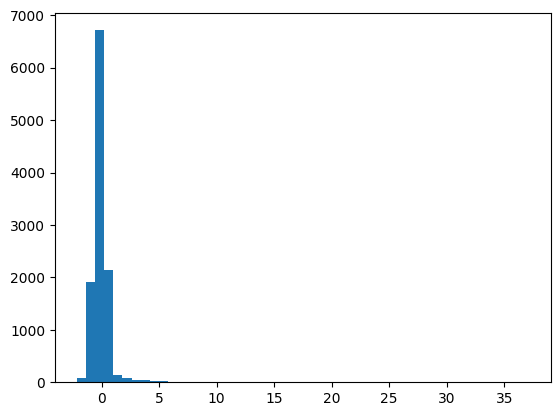

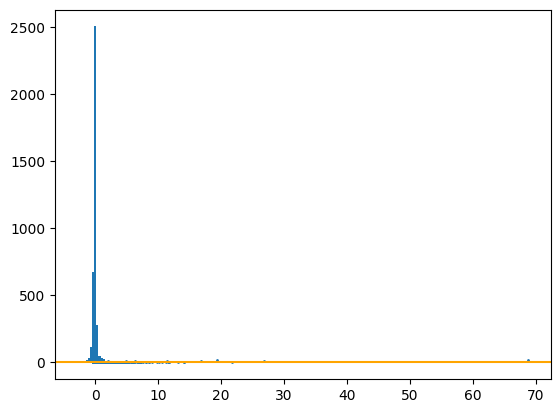

In [88]:

resids  = y_train1- lr1.predict(X_train1)
plt.hist(resids, bins=50);
plt.show()
resids  = y_test2- lr2.predict(X_test2)
plt.hist(resids, bins=50);
# E - Equal variance of errors
plt.scatter(lr2.predict(X_test2), resids, s=1)
plt.axhline(0, color="orange");

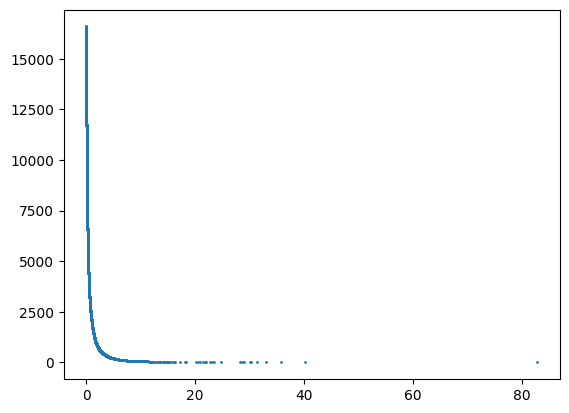

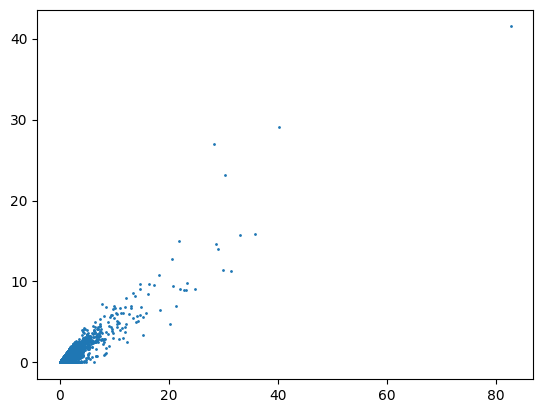

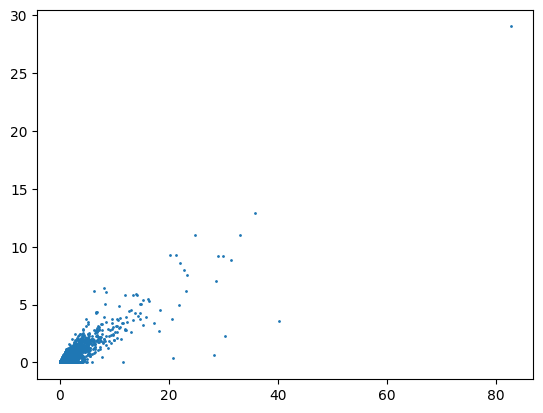

In [ ]:
# L - Linearity
plt.scatter(df_clean["Global_Sales"], df_clean["Rank"], s=1);
plt.show()
plt.scatter(df_clean["Global_Sales"], df_clean["NA_Sales"], s=1);
plt.show()
plt.scatter(df_clean["Global_Sales"], df_clean["EU_Sales"], s=1);